In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.metrics import classification_report, accuracy_score


In [2]:
np.random.seed(0)
data = np.random.normal(0, 1, 100)  # Normal dağılım
data[5] = 10  # Aykırı değer
data[15] = -10  # Aykırı değer
data[40]= 20
data[80]=21
data[81]=22


df = pd.DataFrame(data, columns=['Value'])

In [3]:
true_labels = np.zeros(100)
true_labels[5] = 1
true_labels[15] = 1
true_labels[40] = 1
true_labels[80] = 1
true_labels[81] = 1




In [4]:
df

,Value
0,1.764052
1,0.400157
2,0.978738
3,2.240893
4,1.867558
...,...
95,0.706573
96,0.010500
97,1.785870
98,0.126912


In [5]:
df[["Value"]]

,Value
0,1.764052
1,0.400157
2,0.978738
3,2.240893
4,1.867558
...,...
95,0.706573
96,0.010500
97,1.785870
98,0.126912


In [6]:
def cfar(data, threshold=4, guard_cells=2, training_cells=10):
    n = len(data)
    outliers = np.zeros(n)
    for i in range(guard_cells + training_cells, n - guard_cells - training_cells):
        training_mean = np.mean(data[i-training_cells:i+training_cells])
        if data[i] > training_mean + threshold:
            outliers[i] = 1
    return outliers

cfar_outliers = cfar(data, threshold=4)
df['CFAR_Outlier'] = cfar_outliers


In [7]:
iso_forest=IsolationForest(contamination=0.06,random_state=3)
df["IF_Outlier"] = iso_forest.fit_predict(df[["Value"]])
df['IF_Outlier'] = np.where(df['IF_Outlier'] == -1, 1, 0)  #


In [8]:
df

,Value,CFAR_Outlier,IF_Outlier
0,1.764052,0.0,0
1,0.400157,0.0,0
2,0.978738,0.0,0
3,2.240893,0.0,0
4,1.867558,0.0,0
...,...,...,...
95,0.706573,0.0,0
96,0.010500,0.0,0
97,1.785870,0.0,0
98,0.126912,0.0,0


In [9]:
svm_model_one=OneClassSVM(gamma="auto",nu=0.1)
df["svm_outlier"]=svm_model_one.fit_predict(df[["Value"]])
df['svm_outlier'] = np.where(df['svm_outlier'] == -1, 1, 0)  # -1 aykırı değer, 0 normal

In [10]:
df

,Value,CFAR_Outlier,IF_Outlier,svm_outlier
0,1.764052,0.0,0,0
1,0.400157,0.0,0,0
2,0.978738,0.0,0,0
3,2.240893,0.0,0,0
4,1.867558,0.0,0,0
...,...,...,...,...
95,0.706573,0.0,0,0
96,0.010500,0.0,0,1
97,1.785870,0.0,0,0
98,0.126912,0.0,0,0


In [11]:
knn_model=LocalOutlierFactor(n_neighbors=60)
df["KNN_Outlier"]=knn_model.fit_predict(df[["Value"]])
df['KNN_Outlier'] = np.where(df['KNN_Outlier'] == -1, 1, 0)

In [12]:
df

,Value,CFAR_Outlier,IF_Outlier,svm_outlier,KNN_Outlier
0,1.764052,0.0,0,0,0
1,0.400157,0.0,0,0,0
2,0.978738,0.0,0,0,0
3,2.240893,0.0,0,0,1
4,1.867558,0.0,0,0,0
...,...,...,...,...,...
95,0.706573,0.0,0,0,0
96,0.010500,0.0,0,1,0
97,1.785870,0.0,0,0,0
98,0.126912,0.0,0,0,0


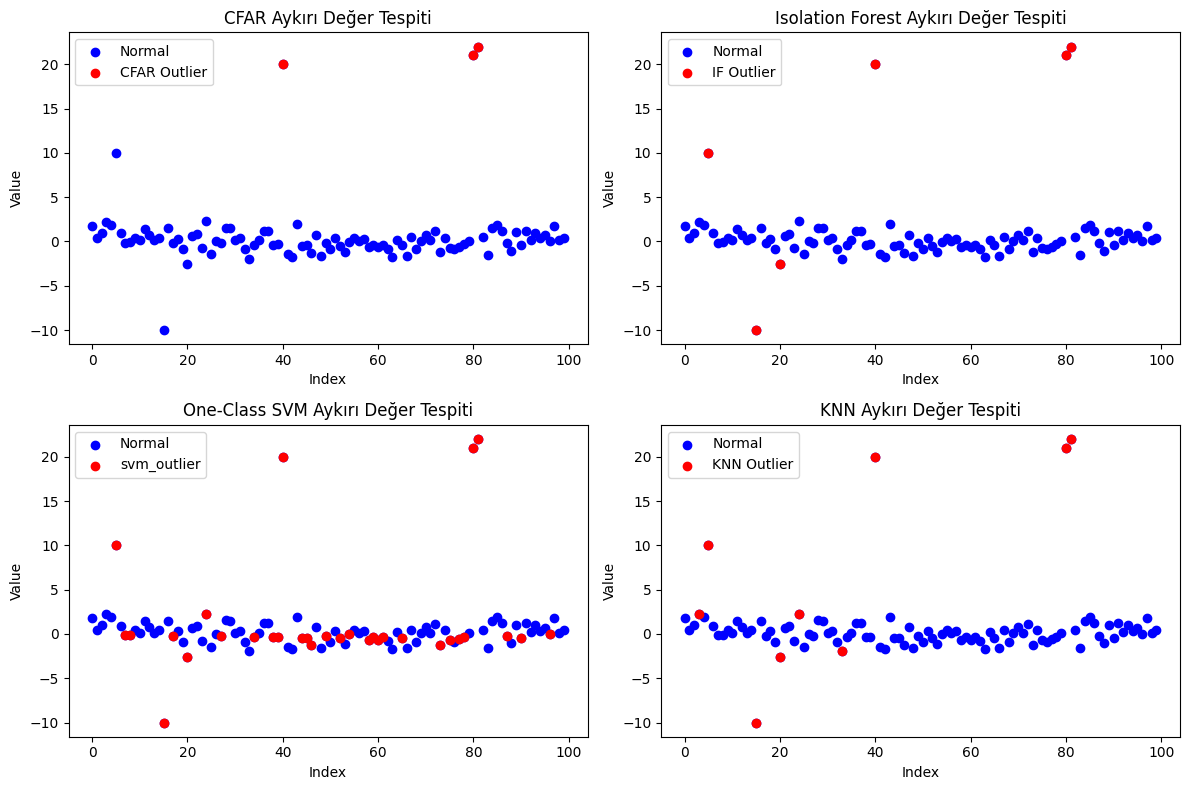

In [14]:
plt.figure(figsize=(12, 8))

# Orijinal veriyi göster
plt.subplot(2, 2, 1)
plt.scatter(df.index, df['Value'], color='blue', label='Normal')
plt.scatter(df.index[df['CFAR_Outlier'] == 1], df['Value'][df['CFAR_Outlier'] == 1], color='red', label='CFAR Outlier')
plt.title('CFAR Aykırı Değer Tespiti')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()

# Isolation Forest
plt.subplot(2, 2, 2)
plt.scatter(df.index, df['Value'], color='blue', label='Normal')
plt.scatter(df.index[df['IF_Outlier'] == 1], df['Value'][df['IF_Outlier'] == 1], color='red', label='IF Outlier')
plt.title('Isolation Forest Aykırı Değer Tespiti')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()

# One-Class SVM
plt.subplot(2, 2, 3)
plt.scatter(df.index, df['Value'], color='blue', label='Normal')
plt.scatter(df.index[df['svm_outlier'] == 1], df['Value'][df['svm_outlier'] == 1], color='red', label='svm_outlier')
plt.title('One-Class SVM Aykırı Değer Tespiti')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()

# KNN
plt.subplot(2, 2, 4)
plt.scatter(df.index, df['Value'], color='blue', label='Normal')
plt.scatter(df.index[df['KNN_Outlier'] == 1], df['Value'][df['KNN_Outlier'] == 1], color='red', label='KNN Outlier')
plt.title('KNN Aykırı Değer Tespiti')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()

plt.tight_layout()
plt.show()


In [18]:
iso_accuracy = accuracy_score(true_labels, df['IF_Outlier'])
svm_accuracy = accuracy_score(true_labels, df['svm_outlier'])
knn_accuracy = accuracy_score(true_labels, df['KNN_Outlier'])
cfar_accuracy= accuracy_score(true_labels,df["CFAR_Outlier"])

print(f"Isolation Forest Doğruluğu: {iso_accuracy:.2f}")
print(f"One-Class SVM Doğruluğu: {svm_accuracy:.2f}")
print(f"KNN Doğruluğu: {knn_accuracy:.2f}")
print(f"Cfar Doğruluğu: {cfar_accuracy:.2f}")


Isolation Forest Doğruluğu: 0.99
One-Class SVM Doğruluğu: 0.73
KNN Doğruluğu: 0.96
Cfar Doğruluğu: 0.98
